<!-- dom:TITLE: PHY321: Motion examples, Forces, Newton's Laws and Motion Example -->
# PHY321: Motion examples, Forces, Newton's Laws and Motion Example
<!-- dom:AUTHOR: [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/) at Department of Physics and Astronomy and Facility for Rare Ion Beams (FRIB), Michigan State University, USA & Department of Physics, University of Oslo, Norway -->
<!-- Author: -->  
**[Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/)**, Department of Physics and Astronomy and Facility for Rare Ion Beams (FRIB), Michigan State University, USA and Department of Physics, University of Oslo, Norway

Date: **Feb 1, 2021**

Copyright 1999-2021, [Morten Hjorth-Jensen](http://mhjgit.github.io/info/doc/web/). Released under CC Attribution-NonCommercial 4.0 license




## Aims and Overarching Motivation

### Monday

We try to finalize the discussion we started last Friday on falling objects and numerical aspects thereof.
If we get time, we start with a discussion of forces as well.

Recommended reading: Taylor 1.3

### Wednesday

We revisit Newton's laws and discuss how to analyze a problem.

Recommended reading: Taylor 1.4 and 1.5

### Friday

We discuss several examples and try to wrap up the discussions on Newton's laws.

Recommended reading: Taylor 1.4-1.6 and 2.1-2.2 as examples of motion problems.



## Basic Steps of Scientific Investigations

Last week we discussed several basi elements of the scientific method. We repeat them here.

An overarching aim in this course is to give you a deeper
understanding of the scientific method. The problems we study will all
involve cases where we can apply classical mechanics. In our previous
material we already assumed that we had a model for the motion of an
object.  Alternatively we could have data from experiment (like Usain
Bolt's 100m world record run in 2008).  Or we could have performed
ourselves an experiment and we want to understand which forces are at
play and whether these forces can be understood in terms of
fundamental forces.

Our first step consists in identifying the problem. What we sketch
here may include a mix of experiment and theoretical simulations, or
just experiment or only theory.

## Identifying our System

Here we can ask questions like
1. What kind of object is moving

2. What kind of data do we have

3. How do we measure position, velocity, acceleration etc

4. Which initial conditions influence our system

5. Other aspects which allow us to identify the system

## Defining a Model

With our eventual data and observations we would now like to develop a
model for the system. In the end we want obviously to be able to
understand which forces are at play and how they influence our
specific system. That is, can we extract some deeper insights about a
system?

We need then to
1. Find the forces that act on our system

2. Introduce models for the forces

3. Identify the equations which can govern the system (Newton's second law for example)

4. More elements we deem important for defining our model

## Solving the Equations

With the model at hand, we can then solve the equations. In classical mechanics we normally end up  with solving sets of coupled ordinary differential equations or partial differential equations.
1. Using Newton's second law we have equations of the type $\boldsymbol{F}=m\boldsymbol{a}=md\boldsymbol{v}/dt$

2. We need to  define the initial conditions (typically the initial velocity and position as functions of time) and/or initial conditions and boundary conditions

3. The solution of the equations give us then the position, the velocity and other time-dependent quantities which may specify the motion of a given object.

We are not yet done. With our lovely solvers, we need to start thinking.

## Analyze

Now it is time to ask the big questions. What do our results mean? Can we give a simple interpretation in terms of fundamental laws?  What do our results mean? Are they correct?
Thus, typical questions we may ask are
1. Are our results for say $\boldsymbol{r}(t)$ valid?  Do we trust what we did?  Can you validate and verify the correctness of your results?

2. Evaluate the answers and their implications

3. Compare with experimental data if possible. Does our model make sense?

4. and obviously many other questions.

The analysis stage feeds back to the first stage. It may happen that
the data we had were not good enough, there could be large statistical
uncertainties. We may need to collect more data or perhaps we did a
sloppy job in identifying the degrees of freedom.

All these steps are essential elements in a scientific
enquiry. Hopefully, through a mix of numerical simulations, analytical
calculations and experiments we may gain a deeper insight about the
physics of a specific system.


## Falling baseball in one dimension

We anticipate the mathematical model to come and assume that we have a
model for the motion of a falling baseball without air resistance.
Our system (the baseball) is at an initial height $y_0$ (which we will
specify in the program below) at the initial time $t_0=0$. In our program example here we will plot the position in steps of $\Delta t$ up to a final time $t_f$. 
The mathematical formula for the position $y(t)$ as function of time $t$ is

$$
y(t) = y_0-\frac{1}{2}gt^2,
$$

where $g=9.80665=0.980655\times 10^1$m/s${}^2$ is a constant representing the standard acceleration due to gravity.
We have here adopted the conventional standard value. This does not take into account other effects, such as buoyancy or drag.
Furthermore, we stop when the ball hits the ground, which takes place at

$$
y(t) = 0= y_0-\frac{1}{2}gt^2,
$$

which gives us a final time $t_f=\sqrt{2y_0/g}$. 

As of now we simply assume that   we know the formula for the falling object. Afterwards, we will derive it.

## Our Python Encounter

We start with preparing folders for storing our calculations, figures and if needed, specific data files we use as input or output files.

In [ ]:
%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

#in case we have an input file we wish to read in
#infile = open(data_path("MassEval2016.dat"),'r')

You could also define a function for making our plots. You
can obviously avoid this and simply set up various **matplotlib**
commands every time you need them. You may however find it convenient
to collect all such commands in one function and simply call this
function.

In [ ]:
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'

def MakePlot(x,y, styles, labels, axlabels):
    plt.figure(figsize=(10,6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label = labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

Thereafter we start setting up the code for the falling object.

In [ ]:
%matplotlib inline
import matplotlib.patches as mpatches

g = 9.80655 #m/s^2
y_0 = 10.0 # initial position in meters
DeltaT = 0.1  # time step
# final time when y = 0, t = sqrt(2*10/g)
tfinal = np.sqrt(2.0*y_0/g)
#set up arrays 
t = np.arange(0,tfinal,DeltaT)
y =y_0 -g*.5*t**2
# Then make a nice printout in table form using Pandas
import pandas as pd
from IPython.display import display
data = {'t[s]': t,
        'y[m]': y
        }
RawData = pd.DataFrame(data)
display(RawData)
plt.style.use('ggplot')
plt.figure(figsize=(8,8))
plt.scatter(t, y, color = 'b')
blue_patch = mpatches.Patch(color = 'b', label = 'Height y as function of  time t')
plt.legend(handles=[blue_patch])
plt.xlabel("t[s]")
plt.ylabel("y[m]")
save_fig("FallingBaseball")
plt.show()

Here we used **pandas** (see below) to systemize the output of the position as function of time.


## Average quantities
We define now the average velocity as

$$
\overline{v}(t) = \frac{y(t+\Delta t)-y(t)}{\Delta t}.
$$

In the code we have set the time step $\Delta t$ to a given value. We could define it in terms of the number of points $n$ as

$$
\Delta t = \frac{t_{\mathrm{final}-}t_{\mathrm{initial}}}{n}.
$$

Since we have discretized the variables, we introduce the counter $i$ and let $y(t)\rightarrow y(t_i)=y_i$ and $t\rightarrow t_i$
with $i=0,1,\dots, n$. This gives us the following shorthand notations that we will use for the rest of this course. We define

$$
y_i = y(t_i),\hspace{0.2cm} i=0,1,2,\dots,n.
$$

This applies to other variables which depend on say time. Examples are the velocities, accelerations, momenta etc.
Furthermore we use the shorthand

$$
y_{i\pm 1} = y(t_i\pm \Delta t),\hspace{0.12cm} i=0,1,2,\dots,n.
$$

## Compact equations
We can then rewrite in a more compact form the average velocity as

$$
\overline{v}_i = \frac{y_{i+1}-y_{i}}{\Delta t}.
$$

The velocity is defined as the change in position per unit time.
In the limit $\Delta t \rightarrow 0$ this defines the instantaneous velocity, which is nothing but the slope of the position at a time $t$.
We have thus

$$
v(t) = \frac{dy}{dt}=\lim_{\Delta t \rightarrow 0}\frac{y(t+\Delta t)-y(t)}{\Delta t}.
$$

Similarly, we can define the average acceleration as the change in velocity per unit time as

$$
\overline{a}_i = \frac{v_{i+1}-v_{i}}{\Delta t},
$$

resulting in the instantaneous acceleration

$$
a(t) = \frac{dv}{dt}=\lim_{\Delta t\rightarrow 0}\frac{v(t+\Delta t)-v(t)}{\Delta t}.
$$

**A note on notations**: When writing for example the velocity as $v(t)$ we are then referring to the continuous and instantaneous value. A subscript like
$v_i$ refers always to the discretized values.

## A differential equation
We can rewrite the instantaneous acceleration as

$$
a(t) = \frac{dv}{dt}=\frac{d}{dt}\frac{dy}{dt}=\frac{d^2y}{dt^2}.
$$

This forms the starting point for our definition of forces later. It is a famous second-order differential equation. If the acceleration is constant we can now recover the formula for the falling ball we started with.
The acceleration can depend on the position and the velocity. To be more formal we should then write the above differential equation as

$$
\frac{d^2y}{dt^2}=a(t,y(t),\frac{dy}{dt}).
$$

With given initial conditions for $y(t_0)$ and $v(t_0)$ we can then
integrate the above equation and find the velocities and positions at
a given time $t$.

If we multiply with mass, we have one of the famous expressions for Newton's second law,

$$
F(y,v,t)=m\frac{d^2y}{dt^2}=ma(t,y(t),\frac{dy}{dt}),
$$

where $F$ is the force acting on an object with mass $m$. We see that it also has the right dimension, mass times length divided by time squared.
We will come back to this soon.

## Integrating our equations

Formally we can then, starting with the acceleration (suppose we have measured it, how could we do that?)
compute say the height of a building.  To see this we perform the following integrations from an initial time $t_0$  to a given time $t$

$$
\int_{t_0}^t dt a(t) = \int_{t_0}^t dt \frac{dv}{dt} = v(t)-v(t_0),
$$

or as

$$
v(t)=v(t_0)+\int_{t_0}^t dt a(t).
$$

When we know the velocity as function of time, we can find the position as function of time starting from the defintion of velocity as the derivative with respect to time, that is we have

$$
\int_{t_0}^t dt v(t) = \int_{t_0}^t dt \frac{dy}{dt} = y(t)-y(t_0),
$$

or as

$$
y(t)=y(t_0)+\int_{t_0}^t dt v(t).
$$

These equations define what is called the integration method for
finding the position and the velocity as functions of time. There is
no loss of generality if we extend these equations to more than one
spatial dimension.

## Constant acceleration case, the velocity

Let us compute the velocity using the constant value for the acceleration given by $-g$. We have

$$
v(t)=v(t_0)+\int_{t_0}^t dt a(t)=v(t_0)+\int_{t_0}^t dt (-g).
$$

Using our initial time as $t_0=0$s and setting the initial velocity $v(t_0)=v_0=0$m/s we get when integrating

$$
v(t)=-gt.
$$

The more general case is

$$
v(t)=v_0-g(t-t_0).
$$

We can then integrate the velocity and obtain the final formula for the position as function of time through

$$
y(t)=y(t_0)+\int_{t_0}^t dt v(t)=y_0+\int_{t_0}^t dt v(t)=y_0+\int_{t_0}^t dt (-gt),
$$

With $y_0=10$m and $t_0=0$s, we obtain the equation we started with

$$
y(t)=10-\frac{1}{2}gt^2.
$$

## Computing the averages
After this mathematical background we are now ready to compute the mean velocity using our data.

In [ ]:
# Now we can compute the mean velocity using our data
# We define first an array Vaverage
n = np.size(t)
Vaverage = np.zeros(n)
for i in range(1,n):
    Vaverage[i] = (y[i]-y[i-1])/DeltaT
# Now we can compute the mean accelearatio using our data
# We define first an array Aaverage
n = np.size(t)
Aaverage = np.zeros(n)
Aaverage[0] = -g
for i in range(1,n):
    Aaverage[i] = (Vaverage[i]-Vaverage[i-1])/DeltaT
data = {'t[s]': t,
        'y[m]': y,
        'v[m/s]': Vaverage,
        'a[m/s^2]': Aaverage
        }
NewData = pd.DataFrame(data)
display(NewData[0:n])

Note that we used the previous value in the computation of the average velocities and accelerations. We did this since we wanted to compute the value for $i=1$ as well. 



## Including Air Resistance in our model

In our discussions till now of the falling baseball, we have ignored
air resistance and simply assumed that our system is only influenced
by the gravitational force.  We will postpone the derivation of air
resistance till later, after our discussion of Newton's laws and
forces.

For our discussions here it suffices to state that the accelerations is now modified to

$$
\boldsymbol{a}(t) = -g +D\boldsymbol{v}(t)\vert v(t)\vert,
$$

where $\vert v(t)\vert$ is the absolute value of the velocity and $D$ is a constant which pertains to the specific object we are studying.
Since we are dealing with motion in one dimension, we can simplify the above to

$$
a(t) = -g +Dv^2(t).
$$

We can rewrite this as a differential equation

$$
a(t) = \frac{dv}{dt}=\frac{d^2y}{dt^2}= -g +Dv^2(t).
$$

Using the integral equations discussed above we can integrate twice
and obtain first the velocity as function of time and thereafter the
position as function of time.

For this particular case, we can actually obtain an analytical
solution for the velocity and for the position. Here we will first
compute the solutions analytically, thereafter we will derive Euler's
method for solving these differential equations numerically.

## Analytical solutions

For simplicity let us just write $v(t)$ as $v$. We have

$$
\frac{dv}{dt}= -g +Dv^2(t).
$$

We can solve this using the technique of separation of variables. We
isolate on the left all terms that involve $v$ and on the right all
terms that involve time. We get then

$$
\frac{dv}{g -Dv^2(t) }= -dt,
$$

We scale now the equation to the left by introducing a constant
$v_T=\sqrt{g/D}$. This constant has dimension length/time. Can you
show this?

Next we integrate the left-hand side (lhs) from $v_0=0$ m/s to $v$ and
the right-hand side (rhs) from $t_0=0$ to $t$ and obtain

$$
\int_{0}^v\frac{dv}{g -Dv^2(t) }= \frac{v_T}{g}\mathrm{arctanh}(\frac{v}{v_T})  =-\int_0^tdt = -t.
$$

We can reorganize these equations as

$$
v_T\mathrm{arctanh}(\frac{v}{v_T})  =-gt,
$$

which gives us $v$ as function of time

$$
v(t)=v_T\tanh{-(\frac{gt}{v_T})}.
$$

## Finding the final height
With the velocity we can then find the height $y(t)$ by integrating yet another time, that is

$$
y(t)=y(t_0)+\int_{t_0}^t dt v(t)=\int_{0}^t dt[v_T\tanh{-(\frac{gt}{v_T})}].
$$

This integral is a little bit trickier but we can look it up in a table over 
known integrals and we get

$$
y(t)=y(t_0)-\frac{v_T^2}{g}\log{[\cosh{(\frac{gt}{v_T})}]}.
$$

Alternatively we could have used the symbolic Python package **Sympy**.

In most cases however, we need to revert to numerical solutions. 


## Our first attempt at solving differential equations

Here we will try the simplest possible approach to solving the second-order differential 
equation

$$
a(t) =\frac{d^2y}{dt^2}= -g +Dv^2(t).
$$

We rewrite it as two coupled first-order equations (this is a standard approach)

$$
\frac{dy}{dt} = v(t),
$$

with initial condition $y(t_0)=y_0$ and

$$
a(t) =\frac{dv}{dt}= -g +Dv^2(t),
$$

with initial condition $v(t_0)=v_0$.

Many of the algorithms for solving differential equations start with simple Taylor equations.
If we now Taylor expand $y$ and $v$ around a value $t+\Delta t$ we have

$$
y(t+\Delta t) = y(t)+\Delta t \frac{dy}{dt}+\frac{\Delta t^2}{2!} \frac{d^2y}{dt^2}+O(\Delta t^3),
$$

and

$$
v(t+\Delta t) = v(t)+\Delta t \frac{dv}{dt}+\frac{\Delta t^2}{2!} \frac{d^2v}{dt^2}+O(\Delta t^3).
$$

Using the fact that $dy/dt = v$ and $dv/dt=a$ and keeping only terms up to $\Delta t$ we have

$$
y(t+\Delta t) = y(t)+\Delta t v(t)+O(\Delta t^2),
$$

and

$$
v(t+\Delta t) = v(t)+\Delta t a(t)+O(\Delta t^2).
$$

## Discretizing our equations

Using our discretized versions of the equations with for example
$y_{i}=y(t_i)$ and $y_{i\pm 1}=y(t_i+\Delta t)$, we can rewrite the
above equations as (and truncating at $\Delta t$)

$$
y_{i+1} = y_i+\Delta t v_i,
$$

and

$$
v_{i+1} = v_i+\Delta t a_i.
$$

These are the famous Euler equations (forward Euler).

To solve these equations numerically we start at a time $t_0$ and simply integrate up these equations to a final time $t_f$,
The step size $\Delta t$ is an input  parameter in our code.
You can define it directly in the code below as

In [ ]:
DeltaT = 0.1

With a given final time **tfinal**  we can then find the number of integration points via the **ceil** function included in the **math** package of Python
as

In [ ]:
#define final time, assuming that initial time is zero
from math import ceil
tfinal = 0.5
n = ceil(tfinal/DeltaT)
print(n)

The **ceil** function returns the smallest integer not less than the input in say

In [ ]:
x = 21.15
print(ceil(x))

which in the case here is 22.

In [ ]:
x = 21.75
print(ceil(x))

which also yields 22. The  **floor** function in the **math** package
is used to return the closest integer value which is less than or equal to the specified expression or value.
Compare the previous result to the usage of **floor**

In [ ]:
from math import floor
x = 21.75
print(floor(x))

Alternatively, we can define ourselves the number of integration(mesh) points. In this case we could have

In [ ]:
n = 10
tinitial = 0.0
tfinal = 0.5
DeltaT = (tfinal-tinitial)/(n)
print(DeltaT)

Since we will set up one-dimensional arrays that contain the values of
various variables like time, position, velocity, acceleration etc, we
need to know the value of $n$, the number of data points (or
integration or mesh points).  With $n$ we can initialize a given array
by setting all elelements to zero, as done here

In [ ]:
# define array a
a = np.zeros(n)
print(a)

## Code for implementing Euler's method
In the code here we implement this simple Eurler scheme choosing a value for $D=0.0245$ m/s.

,t[s],y[m],v[m/s],a[m/s^2]
0,0.0,0.000000,0.000000,-9.806550
1,0.1,0.049031,-0.980655,-9.804194
2,0.2,0.098034,-1.961074,-9.797128
3,0.3,0.146963,-2.940787,-9.785362
4,0.4,0.195770,-3.919323,-9.768915


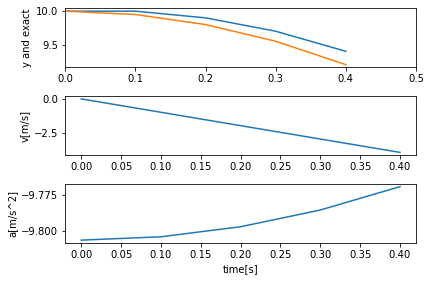

In [1]:
# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


g = 9.80655 #m/s^2
D = 0.00245 #m/s
DeltaT = 0.1
#set up arrays 
tfinal = 0.5
n = ceil(tfinal/DeltaT)
# define scaling constant vT
vT = sqrt(g/D)
# set up arrays for t, a, v, and y and we can compare our results with analytical ones
t = np.zeros(n)
a = np.zeros(n)
v = np.zeros(n)
y = np.zeros(n)
yanalytic = np.zeros(n)
# Initial conditions
v[0] = 0.0  #m/s
y[0] = 10.0 #m
yanalytic[0] = y[0]
# Start integrating using Euler's method
for i in range(n-1):
    # expression for acceleration
    a[i] = -g + D*v[i]*v[i]
    # update velocity and position
    y[i+1] = y[i] + DeltaT*v[i]
    v[i+1] = v[i] + DeltaT*a[i]
    # update time to next time step and compute analytical answer
    t[i+1] = t[i] + DeltaT
    yanalytic[i+1] = y[0]-(vT*vT/g)*log(cosh(g*t[i+1]/vT))
    if ( y[i+1] < 0.0):
        break
a[n-1] = -g + D*v[n-1]*v[n-1]
data = {'t[s]': t,
        'y[m]': y-yanalytic,
        'v[m/s]': v,
        'a[m/s^2]': a
        }
NewData = pd.DataFrame(data)
display(NewData)
#finally we plot the data
fig, axs = plt.subplots(3, 1)
axs[0].plot(t, y, t, yanalytic)
axs[0].set_xlim(0, tfinal)
axs[0].set_ylabel('y and exact')
axs[1].plot(t, v)
axs[1].set_ylabel('v[m/s]')
axs[2].plot(t, a)
axs[2].set_xlabel('time[s]')
axs[2].set_ylabel('a[m/s^2]')
fig.tight_layout()
save_fig("EulerIntegration")
plt.show()

Try different values for $\Delta t$ and study the difference between the exact solution and the numerical solution.

## Simple extension, the Euler-Cromer method

The Euler-Cromer method is a simple variant of the standard Euler
method. We use the newly updated velocity $v_{i+1}$ as an input to the
new position, that is, instead of

$$
y_{i+1} = y_i+\Delta t v_i,
$$

and

$$
v_{i+1} = v_i+\Delta t a_i,
$$

we use now the newly calculate for $v_{i+1}$ as input to $y_{i+1}$, that is 
we compute first

$$
v_{i+1} = v_i+\Delta t a_i,
$$

and then

$$
y_{i+1} = y_i+\Delta t v_{i+1},
$$

Implementing the Euler-Cromer method yields a simple change to the previous code. We only need to change the following line in the loop over time
steps

In [ ]:
for i in range(n-1):
    # more codes in between here
    v[i+1] = v[i] + DeltaT*a[i]
    y[i+1] = y[i] + DeltaT*v[i+1]
    # more code

## Newton's Laws

Let us now remind ourselves of Newton's laws, since these are the laws of motion we will study in this course.


When analyzing a physical system we normally start with distinguishing between the object we are studying (we will label this in more general terms as our **system**) and how this system interacts with the environment (which often means everything else!)

In our investigations we will thus analyze a specific physics problem in terms of the system and the environment.
In doing so we need to identify the forces that act on the system and assume that the
forces acting on the system must have a source, an identifiable cause in
the environment.

A force acting on for example a falling object must be related to an interaction with something in the environment.
This also means that we do not consider internal forces. The latter are forces between
one part of the object and another part. In this course we will mainly focus on external forces.

Forces are either contact forces or long-range forces.

Contact forces, as evident from the name, are forces that occur at the contact between
the system and the environment. Well-known long-range forces are the gravitional force and the electromagnetic force.


## Setting up a model for forces acting on an object

In order to set up the forces which act on an object, the following steps may be useful
1. Divide the problem into system and environment.

2. Draw a figure of the object and everything in contact with the object.

3. Draw a closed curve around the system.

4. Find contact points—these are the points where contact forces may act.

5. Give names and symbols to all the contact forces.

6. Identify the long-range forces.

7. Make a drawing of the object. Draw the forces as arrows, vectors, starting from where the force is acting. The direction of the vector(s) indicates the (positive) direction of the force. Try to make the length of the arrow indicate the relative magnitude of the forces.

8. Draw in the axes of the coordinate system. It is often convenient to make one axis parallel to the direction of motion. When you choose the direction of the axis you also choose the positive direction for the axis.

## Newton's Laws, the Second one first


Newton’s second law of motion: The force $\boldsymbol{F}$ on an object of inertial mass $m$
is related to the acceleration a of the object through

$$
\boldsymbol{F} = m\boldsymbol{a},
$$

where $\boldsymbol{a}$ is the acceleration.

Newton’s laws of motion are laws of nature that have been found by experimental
investigations and have been shown to hold up to continued experimental investigations.
Newton’s laws are valid over a wide range of length- and time-scales. We
use Newton’s laws of motion to describe everything from the motion of atoms to the
motion of galaxies.

The second law is a vector equation with the acceleration having the same
direction as the force. The acceleration is proportional to the force via the mass $m$ of the system under study.


Newton’s second law introduces a new property of an object, the so-called 
inertial mass $m$. We determine the inertial mass of an object by measuring the
acceleration for a given applied force.


## Then the First Law


What happens if the net external force on a body is zero? Applying Newton’s second
law, we find:

$$
\boldsymbol{F} = 0 = m\boldsymbol{a},
$$

which gives using the definition of the acceleration

$$
\boldsymbol{a} = \frac{d\boldsymbol{v}}{dt}=0.
$$

The acceleration is zero, which means that the velocity of the object is constant. This
is often referred to as Newton’s first law. An object in a state of uniform motion tends to remain in
that state unless an external force changes its state of motion.
Why do we need a separate law for this? Is it not simply a special case of Newton’s
second law? Yes, Newton’s first law can be deduced from the second law as we have
illustrated. However, the first law is often used for a different purpose: Newton’s
First Law tells us about the limit of applicability of Newton’s Second law. Newton’s
Second law can only be used in reference systems where the First law is obeyed. But
is not the First law always valid? No! The First law is only valid in reference systems
that are not accelerated. If you observe the motion of a ball from an accelerating
car, the ball will appear to accelerate even if there are no forces acting on it. We call
systems that are not accelerating inertial systems, and Newton’s first law is often
called the law of inertia. Newton’s first and second laws of motion are only valid in
inertial systems. 

A system is an inertial system if it is not accelerated. It means that the reference system
must not be accelerating linearly or rotating. Unfortunately, this means that most
systems we know are not really inertial systems. For example, the surface of the
Earth is clearly not an inertial system, because the Earth is rotating. The Earth is also
not an inertial system, because it ismoving in a curved path around the Sun. However,
even if the surface of the Earth is not strictly an inertial system, it may be considered
to be approximately an inertial system for many laboratory-size experiments.

## And finally the Third Law


If there is a force from object A on object B, there is also a force from object B on object A.
This fundamental principle of interactions is called Newton’s third law. We do not
know of any force that do not obey this law: All forces appear in pairs. Newton’s
third law is usually formulated as: For every action there is an equal and opposite
reaction.